In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit import Aer, execute
import math
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram


Grovers Algorithm
------------------




Initialising Circuit...


Preparing Oracle circuit....


Preparing Amplification circuit....



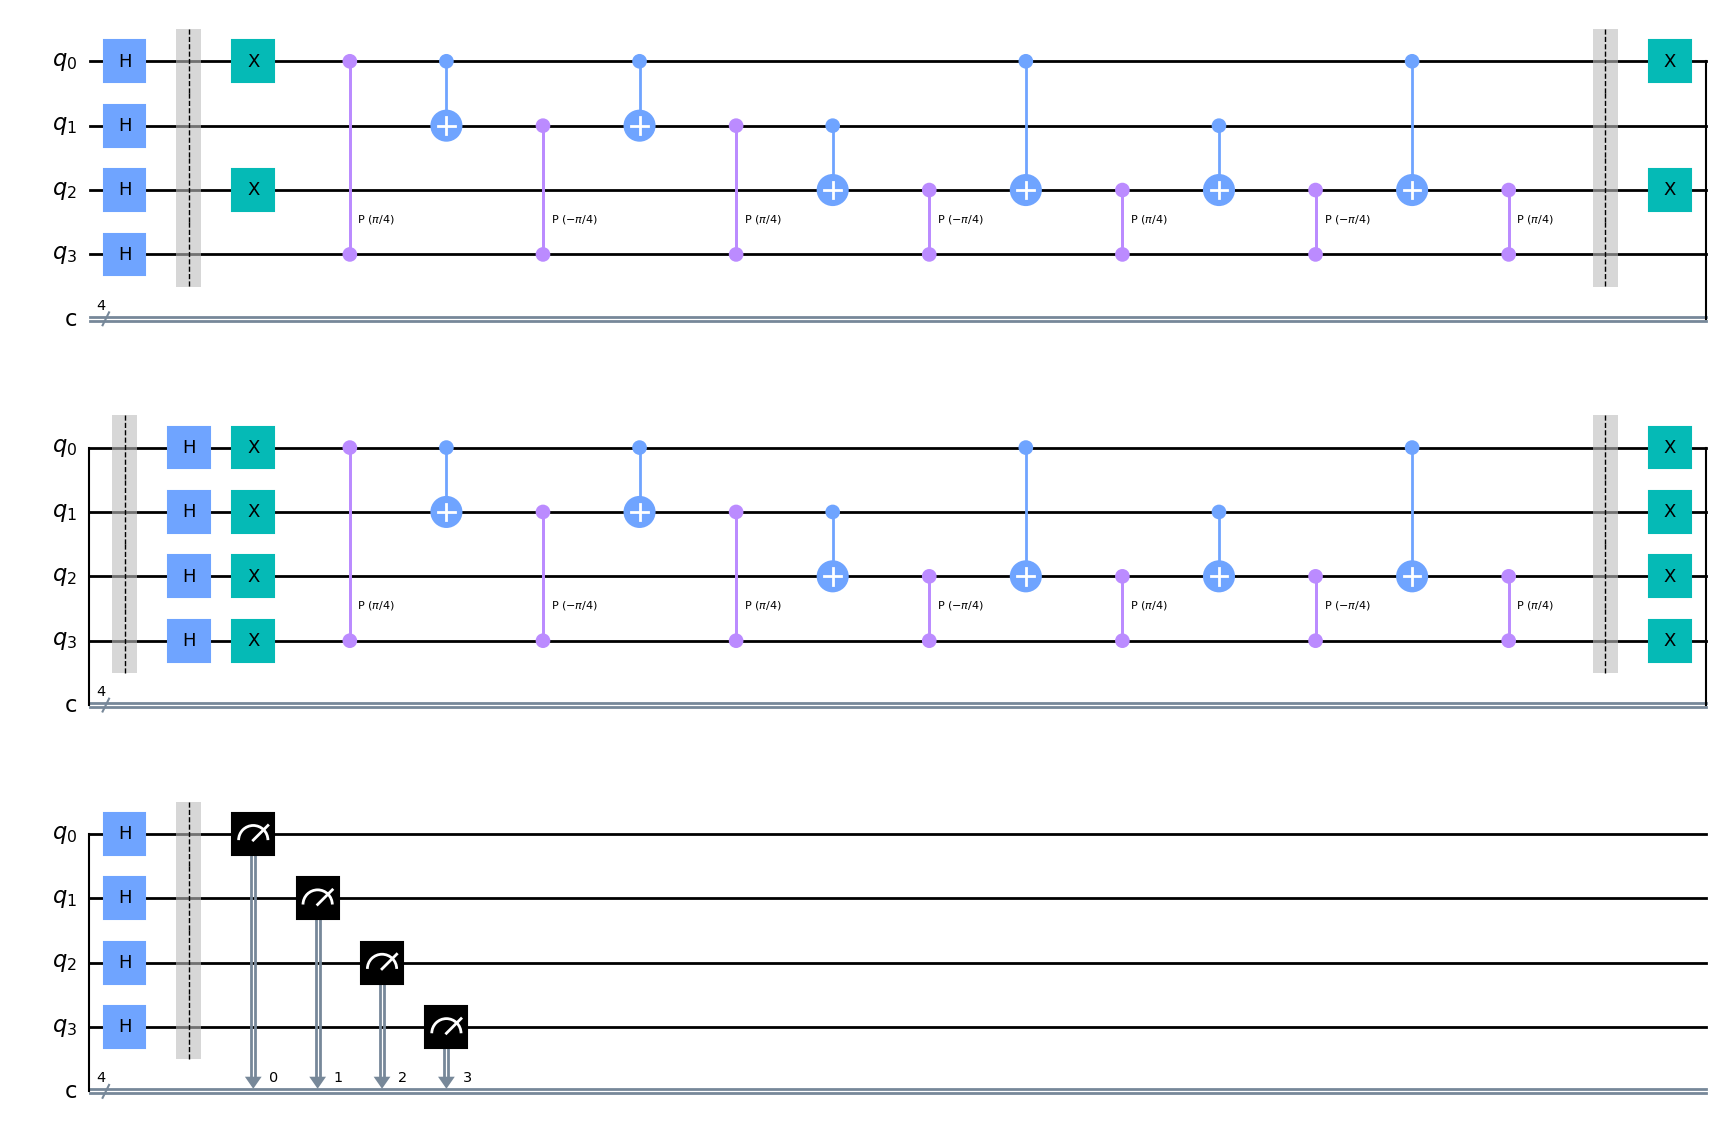

In [5]:
#grover's algorithm with a general search oracle implementation
pi = math.pi
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

#Initialisation

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.barrier()

#search pattern
search = '1010'

for i in range(4):
    if(search[3-i] == '0'):
        qc.x(i)

#search oracle
qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])

qc.barrier()

for i in range(4):
    if(search[3-i] == '0'):
        qc.x(i)
        
qc.barrier()

#Amplification

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cp(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cp(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cp(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cp(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cp(pi/4, q[2], q[3])

qc.barrier()

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

qc.barrier()

qc.measure(range(4),range(4))

qc.draw()


Executing job....



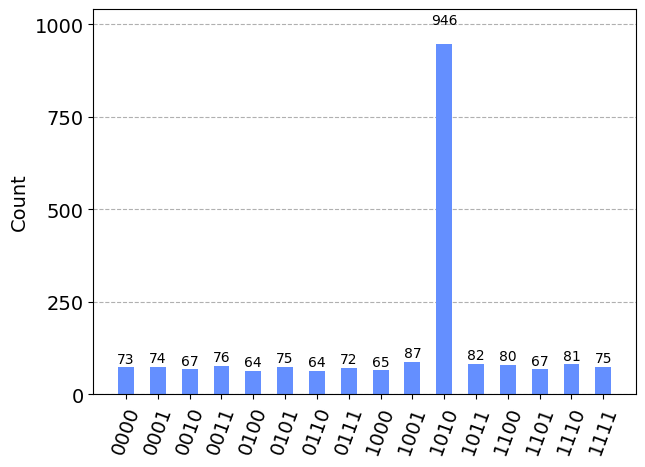

In [6]:
backend = Aer.get_backend('aer_simulator')
print('\nExecuting job....\n')
job = execute(qc, backend, shots=2048)

counts = job.result().get_counts()

plot_histogram(counts)